## Random Forest & Ensemble learning

In [23]:
from sklearn.ensemble import BaggingClassifier                         # Import bagging classifier
from sklearn.tree import DecisionTreeClassifier                        # Import decision tree classifier
from sklearn.ensemble import RandomForestClassifier                    # Import random forest classifier
from sklearn.ensemble import AdaBoostClassifier                        # Import Ada boost classifier
from sklearn.ensemble import GradientBoostingClassifier                # Import Gradient boost classifier
from sklearn.preprocessing import LabelEncoder                         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('heart_disease.csv')

cat_features = df.select_dtypes(include = "object").columns

le = LabelEncoder()
for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))

In [25]:
y = df['HeartDisease']
X = df.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

### Implement Random Forest Classifier

In [26]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

### Implement Bagging Classifier

In [27]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [28]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

1.0

### Implement Adaboost Classifier

In [29]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

### Implement Gradient Boosting Classifier

In [32]:
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, random_state = 0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=0)

### Comparing ROC curves of multiple models

Ada boost - ROC AUC: 0.836215
Gradient boost - ROC AUC: 0.838049


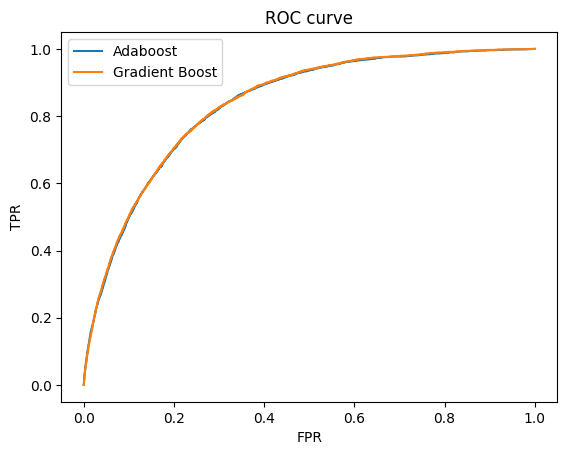

In [33]:
# ROC AUC
y_hat = ada_clf.predict_proba(X_test)
y_hat_gb = gb_clf.predict_proba(X_test)

auc = roc_auc_score(y_test, y_hat[:,1])
print('Ada boost - ROC AUC: %f' % auc)

auc = roc_auc_score(y_test, y_hat_gb[:,1])
print('Gradient boost - ROC AUC: %f' % auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_hat[:,1])
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test, y_hat_gb[:,1])

plt.clf()
plt.plot(fpr, tpr, label="Adaboost")
plt.plot(fpr_gb, tpr_gb, label="Gradient Boost")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()